# SVR Model

In [1]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error ,r2_score 
from statsmodels.tools.eval_measures import rmse
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Load and PreProcess 

In [2]:
data = pd.read_csv('data/PMS_data.csv',nrows=100000)

In [3]:
data.head()

,Flow,Occupy,Speed
0,133.0,0.0603,65.8
1,210.0,0.0589,69.6
2,124.0,0.0358,65.8
3,145.0,0.0416,69.6
4,206.0,0.0493,69.4


In [8]:
new_set = data.copy()

In [9]:
new_set.head()

,Flow,Occupy,Speed
0,133.0,0.0603,65.8
1,210.0,0.0589,69.6
2,124.0,0.0358,65.8
3,145.0,0.0416,69.6
4,206.0,0.0493,69.4


In [10]:
new_set['Speed'] = np.around(new_set['Speed'])
new_set['Flow'] = np.around(new_set['Flow'])
new_set.head()

,Flow,Occupy,Speed
0,133.0,0.0603,66.0
1,210.0,0.0589,70.0
2,124.0,0.0358,66.0
3,145.0,0.0416,70.0
4,206.0,0.0493,69.0


In [11]:
X = new_set['Occupy'].values

y = new_set['Flow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [12]:

regressor = SVR(kernel = 'rbf', C=1.5, epsilon= 0.03)
regressor.fit(X_train.reshape(-1,1),y_train)


SVR(C=1.5, epsilon=0.03)

In [13]:
y_pred = regressor.predict(X_test.reshape(-1,1))

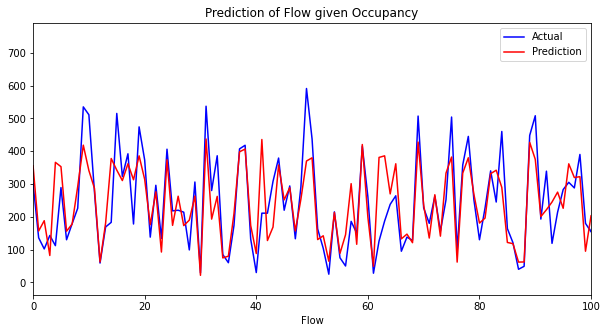

In [39]:
plt.figure(figsize=(10,5))
plt.plot(y_test, color = 'blue',label = "Actual")
plt.xlim(0,100)
plt.plot(y_pred ,color = 'red' ,label = "Prediction")
plt.xlim(0,100)
plt.title('Prediction of Flow given Occupancy')
plt.xlabel('Number of data')
plt.xlabel('Flow')
plt.savefig('occupy_flow.png')
plt.legend()
plt.show()


In [28]:
score = regressor.score(X_test.reshape(-1,1),y_test)

In [29]:
mse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
r2s = r2_score(y_true=y_test,y_pred=y_pred)

In [30]:
print(score)
print(mse)
print(r2s)

0.6259848653337665
87.64354599198325
0.6259848653337665


In [31]:
data_set = new_set.copy()
data_set.head()

,Flow,Occupy,Speed
0,133.0,0.0603,66.0
1,210.0,0.0589,70.0
2,124.0,0.0358,66.0
3,145.0,0.0416,70.0
4,206.0,0.0493,69.0


In [19]:

X1 = data_set['Occupy'].values

y1 = data_set['Speed'].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25)


In [20]:
model_speed = SVR(kernel = 'rbf', C=1.5, epsilon= 0.5)
model_speed.fit(X_train1.reshape(-1,1),y_train1)

SVR(C=1.5, epsilon=0.5)

In [21]:
y_pred1 = model_speed.predict(X_test1.reshape(-1,1))

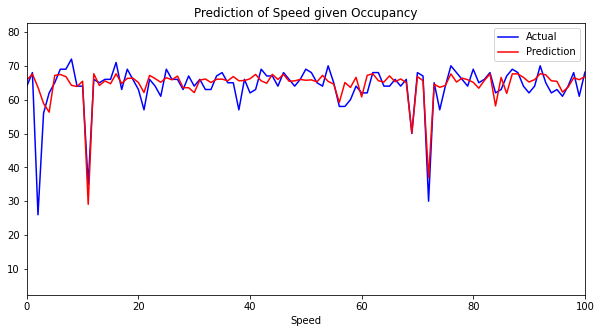

In [40]:
plt.figure(figsize=(10,5))
plt.plot(y_test1, color = 'blue',label = "Actual")
plt.xlim(0,100)
plt.plot(y_pred1 , color = 'red',label = "Prediction")
plt.xlim(0,100)
plt.title('Prediction of Speed given Occupancy')
plt.xlabel('Number of data')
plt.xlabel('Speed')
plt.savefig('occupy_speed.png')
plt.legend()
plt.show()

In [33]:
score1 = model_speed.score(X_test1.reshape(-1,1),y_test1)
mse1 = sqrt(mean_squared_error(y_true=y_test1,y_pred=y_pred1))
r2s1 = r2_score(y_true=y_test1,y_pred=y_pred1)

In [34]:
print(score1)
print(mse1)
print(r2s1)

0.6265186318763037
3.68005032254549
0.6265186318763037
